In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
retail = pd.read_csv(r"C:\Users\dell\Downloads\workspace (1)\workspace\online_retail.csv")
retail.drop_duplicates(inplace=True)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


The "Online Retail" dataset likely contains information about online retail transactions. Let's go through the meaning of each column in the dataset:

InvoiceNo: This column likely contains a unique identifier or code for each retail invoice or transaction. It helps in tracking and identifying individual sales transactions.

StockCode: This column likely contains a code or identifier for the specific product or item being sold in each transaction. It allows the association of products with their respective transactions.

Description: This column probably contains a textual description or name of the product or item being sold. It provides more detailed information about the product.

Quantity: This column likely represents the quantity of the product or item that was sold in each transaction. It indicates how many units of the product were purchased.

InvoiceDate: This column probably records the date and time when each retail invoice or transaction occurred. It provides a timestamp for when the sale took place.

UnitPrice: This column contains the price per unit of the product or item being sold. It represents the cost of one unit of the product.

CustomerID: This column likely contains a unique identifier or code for each customer who made a purchase. It allows tracking of customer-specific transactions.

Country: This column contains the name or code of the country where the customer who made the purchase is located. It provides geographic information about the customers.

This dataset appears to be a record of online retail transactions, including details about the products sold, quantities, prices, customer information, and transaction timestamps. It is commonly used for various types of retail analytics, such as customer segmentation, sales forecasting, and product performance analysis. The dataset can provide insights into customer behavior and sales patterns in the online retail business.

In [4]:
df = retail.copy()

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [7]:
# finding the percentage of null values in each column:
for col in df.columns:
    print(f'{col}: {len(df[df[col].isnull()==True]) / len(df)}')

InvoiceNo: 0.0
StockCode: 0.0
Description: 0.0027094463524031894
Quantity: 0.0
InvoiceDate: 0.0
UnitPrice: 0.0
CustomerID: 0.2516337737891812
Country: 0.0


In [ ]:
#droping the null values in each column and reseting the index:
df.dropna(inplace=True)
df.reset_index(drop=True)

In [9]:
#the new shape of the dataset.
df.shape

(401604, 8)

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


<Axes: >

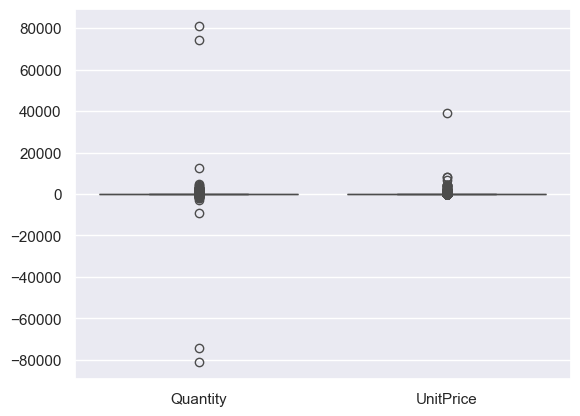

In [11]:
sns.boxplot(df[['Quantity', 'UnitPrice']])

In [12]:
# We can see that we still have outliers in the data as we can see that the max value for UnitPrice is 38970 pound 
#and for Quantity is 80995 for both the min and max wich.

#### Purpose of Outlier Removal:

**Outliers can distort statistical analyses and models by introducing noise and skewing results.**

**Removing outliers helps in obtaining a more representative view of the dataset and its underlying patterns.**

**It can improve the accuracy and reliability of insights derived from the data.**


In [13]:
# Removing outliers for the Quantity column using Z-scores
z_scores = np.abs(stats.zscore(df.Quantity))
threshold = 2
outlier_indices = np.where(z_scores > 2)[0]
df.drop(df.iloc[outlier_indices].index, inplace=True)

In [14]:
# Removing outliers for the UnitPrice column using Z-scores
z_scores = np.abs(stats.zscore(df.UnitPrice))
threshold = 2
outlier_indices = np.where(z_scores > 2)[0]
df.drop(df.iloc[outlier_indices].index, inplace=True)


In [15]:
# We'll remove the UnitPrice thats less than 0.1
df.drop(df[df.UnitPrice <= 0.1].index, inplace=True)

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,400640.000000,400640.000000,400640.000000
mean,11.292220,2.960498,15281.250681
std,26.109882,3.848519,1713.656138
min,-480.000000,0.110000,12347.000000
25%,2.000000,1.250000,13940.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16782.000000
max,512.000000,134.000000,18287.000000


### Now that our data is clean we can start exploring it and answering answer about the data.

#### Negative order quantities indicate returns. Which products have been returned the most?

In [17]:
df[df.Quantity < 0].sort_values(by='Quantity').head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
234363,C557508,23167,SMALL CERAMIC TOP STORAGE JAR,-480,6/20/11 16:13,0.69,16684.0,United Kingdom
319804,C564899,M,Manual,-480,8/31/11 11:31,0.22,14646.0,Netherlands
414135,C572343,22103,MIRROR MOSAIC T-LIGHT HOLDER ROUND,-468,10/24/11 10:40,0.39,14607.0,United Kingdom
155143,C549968,22151,PLACE SETTING WHITE HEART,-432,4/13/11 14:24,0.36,14064.0,United Kingdom
319911,C564940,22564,ALPHABET STENCIL CRAFT,-432,8/31/11 13:10,1.06,12931.0,United Kingdom
289134,C562221,22151,PLACE SETTING WHITE HEART,-432,8/3/11 14:22,0.36,16525.0,United Kingdom
228323,C556925,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-420,6/15/11 14:23,2.75,16013.0,United Kingdom
255423,C559345,21439,BASKET OF TOADSTOOLS,-408,7/7/11 17:16,1.06,13984.0,United Kingdom
319915,C564940,22992,REVOLVER WOODEN RULER,-400,8/31/11 13:10,1.65,12931.0,United Kingdom
319916,C564940,22991,GIRAFFE WOODEN RULER,-400,8/31/11 13:10,1.65,12931.0,United Kingdom


#### Wich product have been sold the most?

In [18]:
#To find the products that have sold the most we'll group the dataframe by the stockcode and get the sum of the quantities for each product.
df.groupby('StockCode')[['Quantity', 'UnitPrice']].sum().sort_values(by='Quantity', ascending=False).head(10)

,Quantity,UnitPrice
StockCode,,
85099B,41763,3334.57
84077,30655,135.31
22197,30497,919.31
84879,30167,2357.14
85123A,30145,5950.24
21212,27026,579.47
22178,20035,1205.18
23203,18908,2276.72
23084,18333,1675.81


#### What is the relation between the Quantity demanded and the UnitPrice?

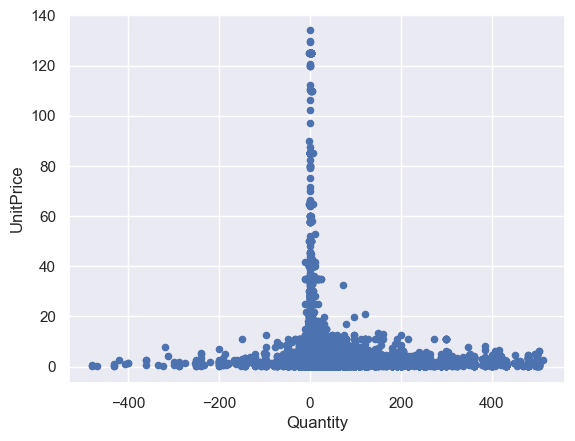

In [19]:
#visualizing the relation between the Quantity and UnitPrice
df.plot(x='Quantity', y='UnitPrice', kind='scatter');

In [20]:
df.corr( numeric_only=True)

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.135259,-0.038181
UnitPrice,-0.135259,1.000000,-0.030297
CustomerID,-0.038181,-0.030297,1.000000


 There seems to be a negative relation between the Quantity and The UnitPrice as we can see from the graph the products with the highest price have  the least Quantity and vice versa.

#### visualizing the profits earned from UK customers weekly and monthly.

In [21]:
#let's turn the invoice data type into datetime and creat a profit column.
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df['profit'] = df.Quantity * df.UnitPrice
df.InvoiceDate

C:\Users\dell\AppData\Local\Temp\ipykernel_17652\2396938827.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.InvoiceDate = pd.to_datetime(df.InvoiceDate)


0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 400640, dtype: datetime64[ns]

In [22]:
#let's set the date as the index so we can resample it.
df.index = df.InvoiceDate
df.drop('InvoiceDate', axis = 1, inplace=True)

In [23]:
# Grouping the data by the country and selecting the UK.

df2 = df[df.Country=='United Kingdom'].resample('W')['profit'].sum()
df3 = df[df.Country=='United Kingdom'].resample('M')['profit'].sum()


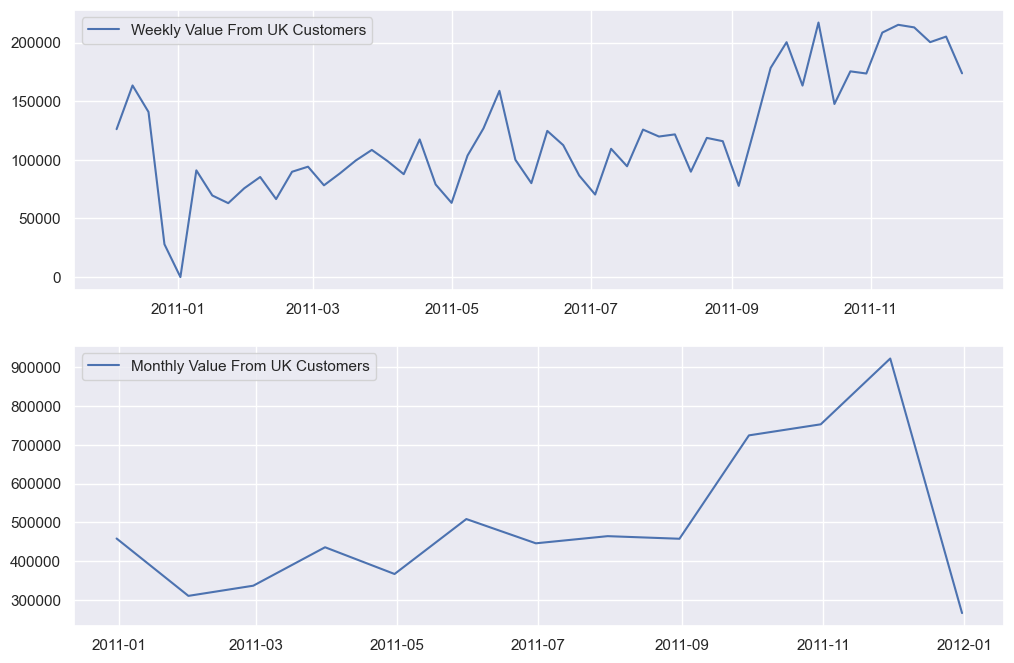

In [24]:
#plotting the data
fig, ax = plt.subplots(2, 1,figsize=(12,8));
ax[0].plot(df2.index, df2, label='Weekly Value From UK Customers');
ax[0].legend();
ax[1].plot(df3.index, df3, label='Monthly Value From UK Customers');
ax[1].legend();

##### We can see that there was a increase in the profits earned from British customers from 9 september 2011 until the end of 2011 and then it returned to its original level.

In [25]:
df.reset_index(inplace=True)

#### Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?

In [26]:
#grouping the by the countries using te mean value to obtain the average quantity of each country.
countries = df.groupby('Country')[['Quantity']].mean()

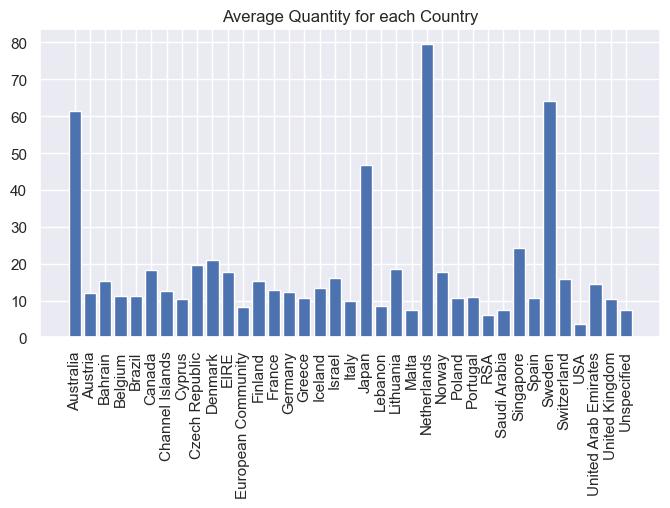

In [27]:
plt.figure(figsize=(8,4));
plt.bar(countries.index, countries.Quantity);
plt.xticks(rotation=90);
plt.title('Average Quantity for each Country');

#### Now i'll start analysing the customers.

In [28]:
# Lets get the number of puchases made by each customer and store it in a new DataFrame to work whit it.
customer = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
customer
#And let's also get the Total Profit obtained from each customer.
profit = df.groupby('CustomerID')['profit'].sum().reset_index()


In [29]:
# let's get the tme since the last purchase for each customer to wich ones are still active.
#first let's get the date of the latest transaction in our dataset
max_date = df.InvoiceDate.max()
#and then calculate the time between each transaction and the last one
df['diff'] = max_date - df.InvoiceDate
time = df.groupby('CustomerID')['diff'].min().reset_index()
time['diff'] = time['diff'].dt.days
time.head()

,CustomerID,diff
0,12347.0,1
1,12348.0,74
2,12349.0,18
3,12350.0,309
4,12352.0,35


In [30]:
customers_df = customer.merge(profit, on ='CustomerID')
customers_df = customers_df.merge(time, on ='CustomerID')

In [31]:
customers_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
customers_df.rename(columns={'profit': 'Value'}, inplace=True)
customers_df.head()

,CustomerID,Frequency,Value,diff
0,12347.0,182,4310.00,1
1,12348.0,31,1797.24,74
2,12349.0,72,1457.55,18
3,12350.0,17,334.40,309
4,12352.0,89,1545.41,35


### Using K-means clustering to group the customers

#### K-Means Clustering is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters. The goal of clustering is to divide the population or set of data points into a number of groups so that the data points within each group are more comparable to one another and different from the data points within the other groups. It is essentially a grouping of things based on how similar and different they are to one another. 

#### Before we use the kmeans clustering first we have to rescale the data to have a mean of 0 and std of 1 so that they have a comparable scale.

In [32]:
X = StandardScaler().fit_transform(customers_df[['Frequency', 'Value', 'diff']])

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


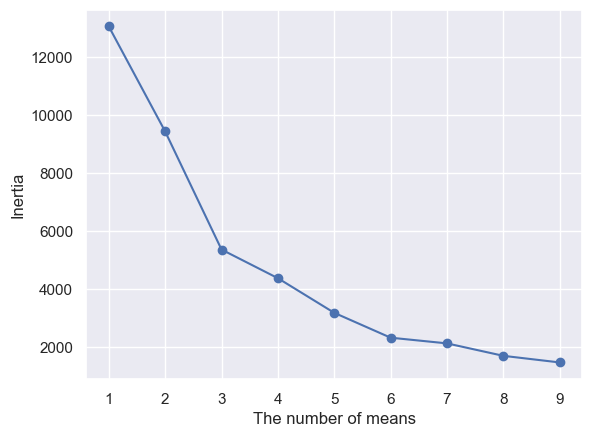

In [33]:
#selecting the number of clusters using the elbow method
def number_clusters(data, clusters):
    means = []
    inertia = []
    for k in range(1, clusters):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        means.append(k)
    plt.plot(means, inertia, '-o');
    plt.xlabel('The number of means');
    plt.ylabel('Inertia');
number_clusters(X, 10)


 From the elbow method we can see that the optimal number of clusters is 3, so i'll choose 3

#### After selecting the number of clusters now i'll apply the Kmeans on the data to obtain the labels for the clusters

In [34]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

In [35]:
customers_df['group'] = labels
customers_df

,CustomerID,Frequency,Value,diff,group
0,12347.0,182,4310.00,1,2
1,12348.0,31,1797.24,74,2
2,12349.0,72,1457.55,18,2
3,12350.0,17,334.40,309,0
4,12352.0,89,1545.41,35,2
...,...,...,...,...,...
4348,18280.0,10,180.60,277,0
4349,18281.0,7,80.82,180,0
4350,18282.0,13,176.60,7,2
4351,18283.0,721,2045.53,3,2


#### Now i'll plot the grouped data to visualize te groups

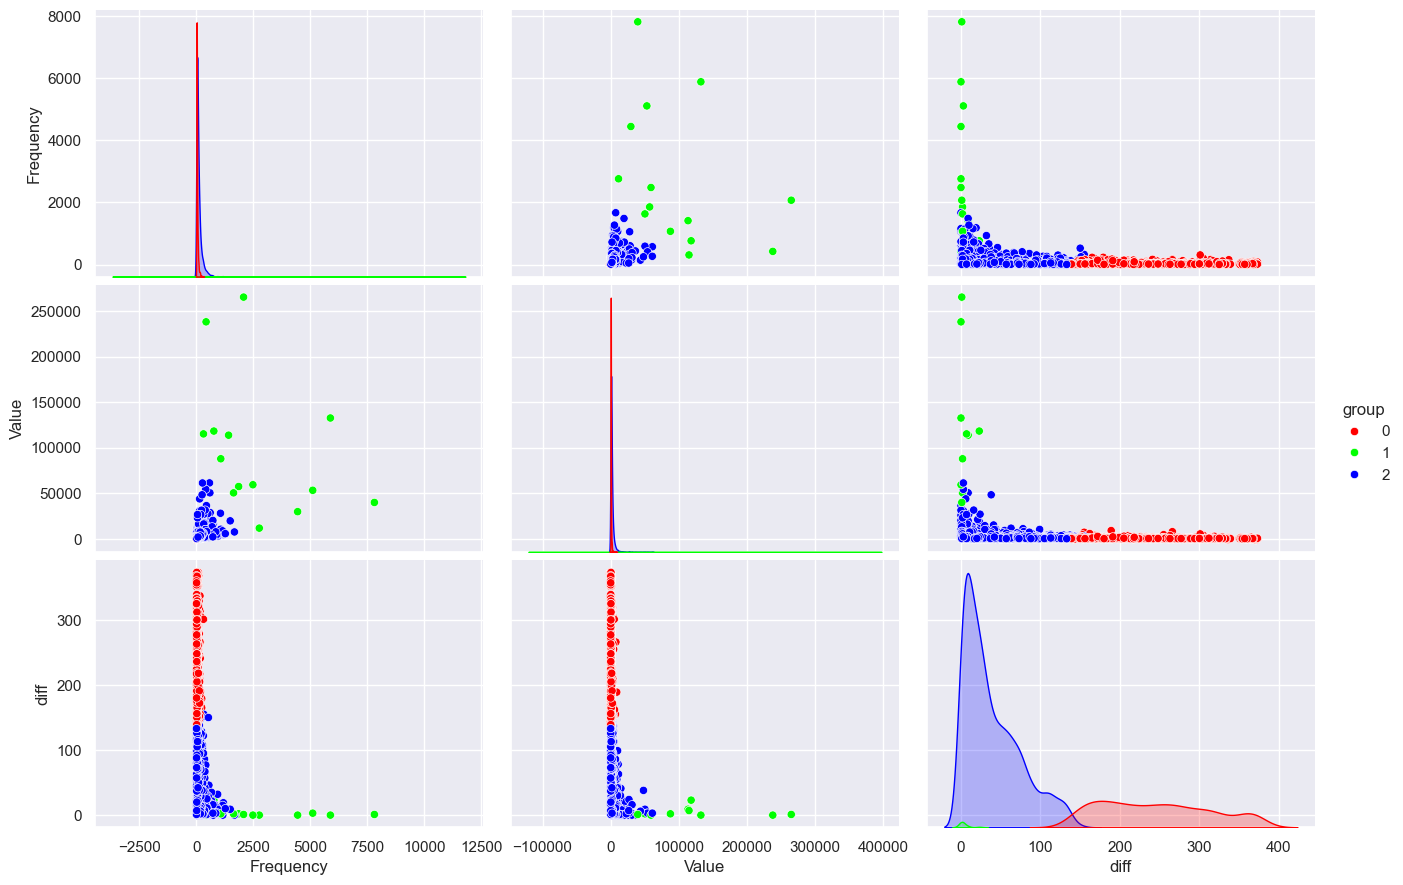

In [36]:
custom_palette = sns.color_palette(["#FF0000", "#00FF00", "#0000FF"])

sns.pairplot(data = customers_df,vars = ['Frequency', 'Value', 'diff'], hue = 'group', palette=custom_palette, height=3, aspect=1.5);

 Frome the graph we can see that group 0 represents the customers with low diff and somewhat low frequency and value wich maybe regulare customers, group 1 represent the customers with the most recent purchases and high frequency and value wich indicates that these customers are the most valubel customers. And group 2 seem to represent the old inactive customers.

In [37]:
#the number of customers in each group
pd.DataFrame(customers_df.group.value_counts())

,count
group,
2,3240
0,1099
1,14


 We can see that the majority of the customers are in group 0 wich means the majority of the customers are regulare customers, while there is about 1000 customers that are inactive And only 12 customers in group 1. 